## Task 1: Data Collection and Cleaning ##

## Six-Step Inference Process to your topic:

Step	Explanation (for your project)
1. What is the question of interest?	
<br>Did recent US-China tariffs cause phone/electronic prices to go up?
2. What population is associated with the question?
<br>All imported/exported electronic devices between US, China, and other countries (especially under Chapter 85 from WTO data).
4. Take a sample from the population
<br>Use available WTO tariff/export data (like the Excel file you have) focused on Chapter 85 (electronics).
6. Measure one or more variables in each unit
<br>Measure: tariff rate, export/import value, and maybe price if available.
8. Make a summary of all sample data
<br>Use Python to summarize average tariff rate, import/export volume over time.
10. Make inference from the sample	Conclude if the tariff increase is linked to trade volume drops or price increases.

## Column Name	Explanation
**importer**: The country that is buying or bringing in the electronic items (like phones 📱)<br>
**year**: The year this information was recorded — like 2023, 2024, etc. 📅<br>
**value_usd**: How much money 💵 was spent to buy these electronics, counted in US dollars ($).<br>
**mfn_avg_duty**: This is the average tax (in %) the country usually charges for everyone (called MFN = Most Favored Nation). Think of it like a regular price of tax. 💸<br>
**best_avg_duty**: This is the lowest tax the country gives to special trade partners (like a discount for friends). 🛍️<br>
**mfn_line_count**: The number of different types of products that have the regular (MFN) tax. Think of it like how many kinds of electronics are being taxed. 📦📱🖥️<br>
**mfn_nonadval_line**: This is how many products get a special kind of tax — not based on price, but maybe on weight or quantity (called non-ad valorem tax). ⚖️<br>
**pref_line_count**: The number of product types that get friendly discount tax (special deals). 🎁<br>
**pref_nonadval_line**: Like above, but for those friendly deals that use a non-standard tax (not based on value). 📊<br>

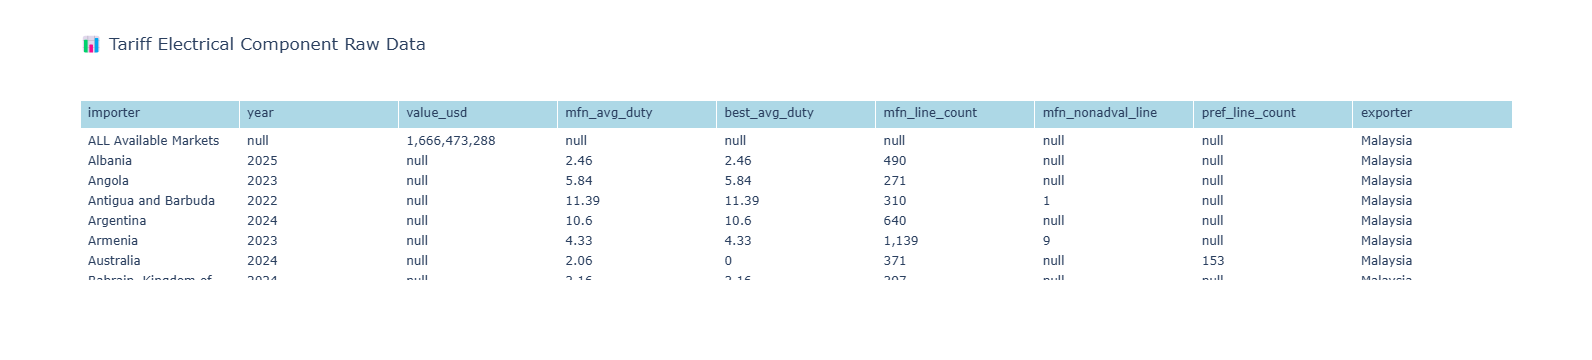

In [265]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
df = pd.read_csv("Data/Tariff electrical component.csv")

fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='white',
               align='left'))
])

fig.update_layout(title="📊 Tariff Electrical Component Raw Data")
fig.show()

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   importer           854 non-null    object 
 1   year               847 non-null    float64
 2   value_usd          68 non-null     object 
 3   mfn_avg_duty       847 non-null    float64
 4   best_avg_duty      847 non-null    float64
 5   mfn_line_count     847 non-null    object 
 6   mfn_nonadval_line  173 non-null    float64
 7   pref_line_count    70 non-null     float64
 8   exporter           854 non-null    object 
dtypes: float64(5), object(4)
memory usage: 60.2+ KB


## **Clean Dataset**

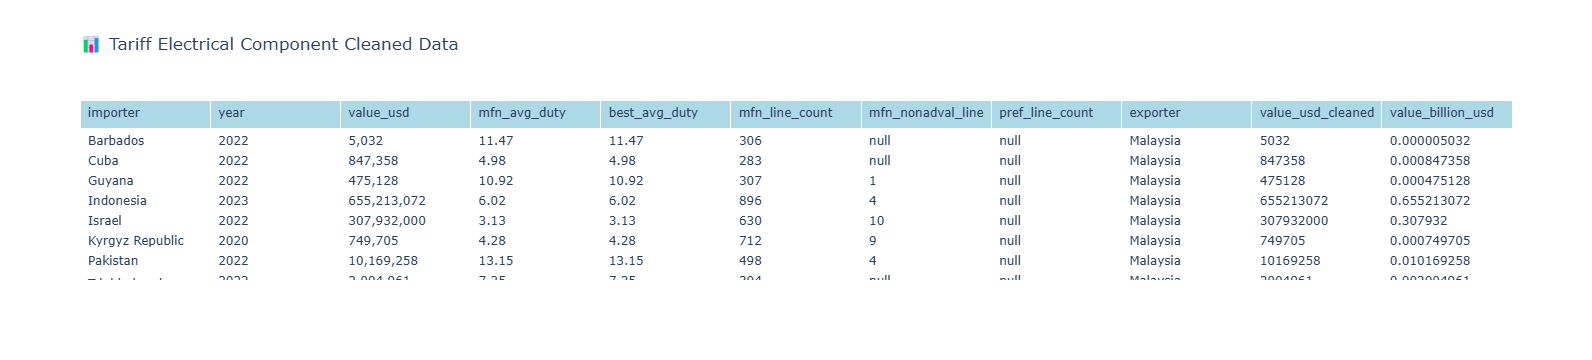

In [270]:
# Drop invalid rows
df = df.dropna(subset=['year', 'value_usd', 'mfn_avg_duty'])

# Remove 'ALL Available Markets' row
df = df[df['importer'] != 'ALL Available Markets']

# Fix data types
df['year'] = df['year'].astype(int)

# Clean and convert value_usd
df['value_usd_cleaned'] = df['value_usd'].astype(str).str.replace(r'[^0-9]', '', regex=True)
df['value_usd_cleaned'] = pd.to_numeric(df['value_usd_cleaned'], errors='coerce')
df = df.dropna(subset=['value_usd_cleaned']) 
df['value_billion_usd'] = df['value_usd_cleaned'] / 1_000_000_000

# Optional: Convert other numeric columns
numeric_cols = ['mfn_avg_duty', 'best_avg_duty', 'mfn_line_count']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


fig = go.Figure(data=[go.Table(
    header=dict(values=list(df.columns),
                fill_color='lightblue',
                align='left'),
    cells=dict(values=[df[col] for col in df.columns],
               fill_color='white',
               align='left'))
])

fig.update_layout(title="📊 Tariff Electrical Component Cleaned Data")
fig.show()

## Task 2: Exploratory Data Analysis (EDA) ##

**1. Trade Volume Over Time**

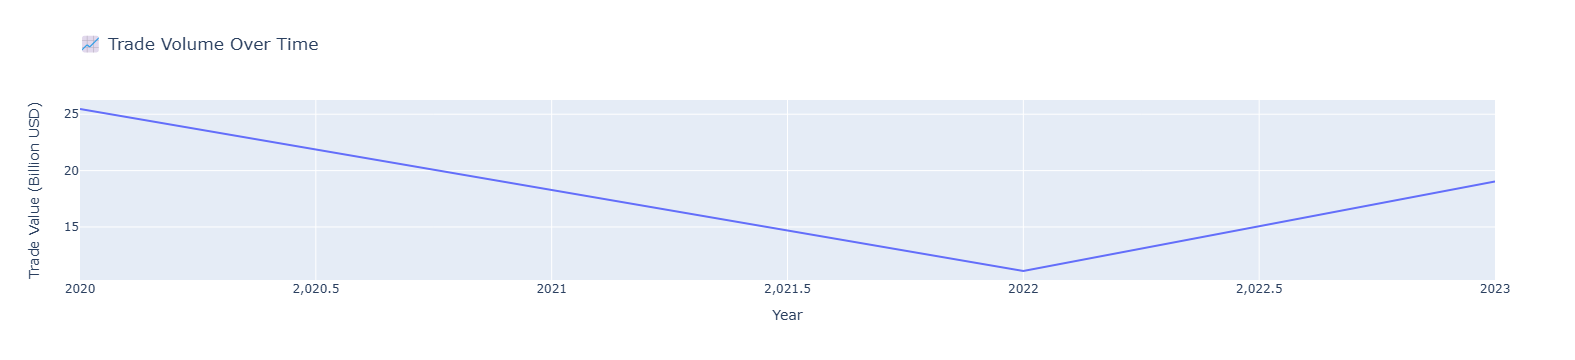

In [274]:
# Trade Volume Over Time
trade_by_year = df.groupby('year')['value_billion_usd'].sum().reset_index()
fig1 = px.line(trade_by_year, x='year', y='value_billion_usd',
               title='📈 Trade Volume Over Time',
               labels={'value_billion_usd': 'Trade Value (Billion USD)', 'year': 'Year'})
fig1.show()


**2. Average Tariff Rate Over Time**

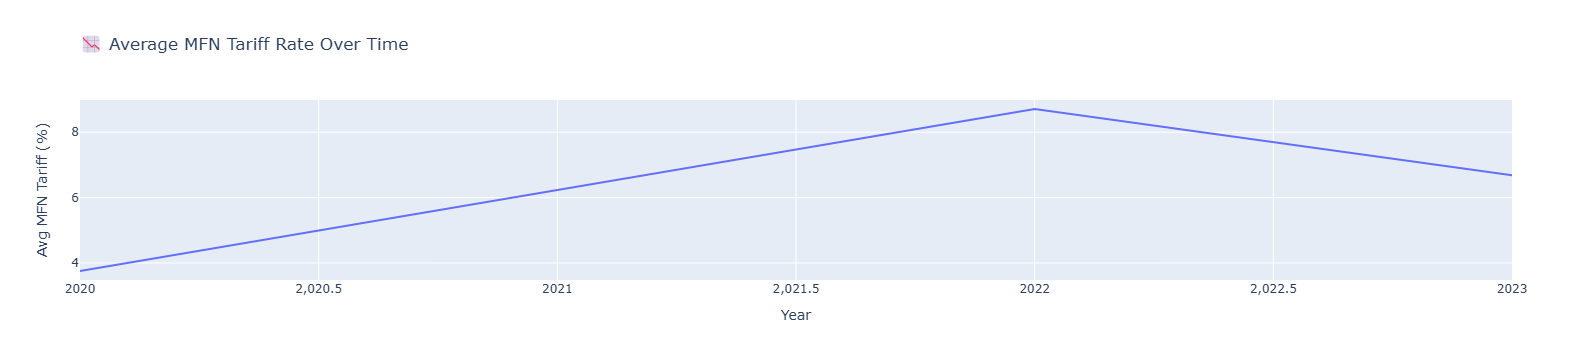

In [277]:
# Average Tariff Rate Over Time
avg_tariff_by_year = df.groupby('year')['mfn_avg_duty'].mean().reset_index()
fig2 = px.line(avg_tariff_by_year, x='year', y='mfn_avg_duty',
               title='📉 Average MFN Tariff Rate Over Time',
               labels={'mfn_avg_duty': 'Avg MFN Tariff (%)', 'year': 'Year'})
fig2.show()

**3. Time-Series Bar Plot (per year)**

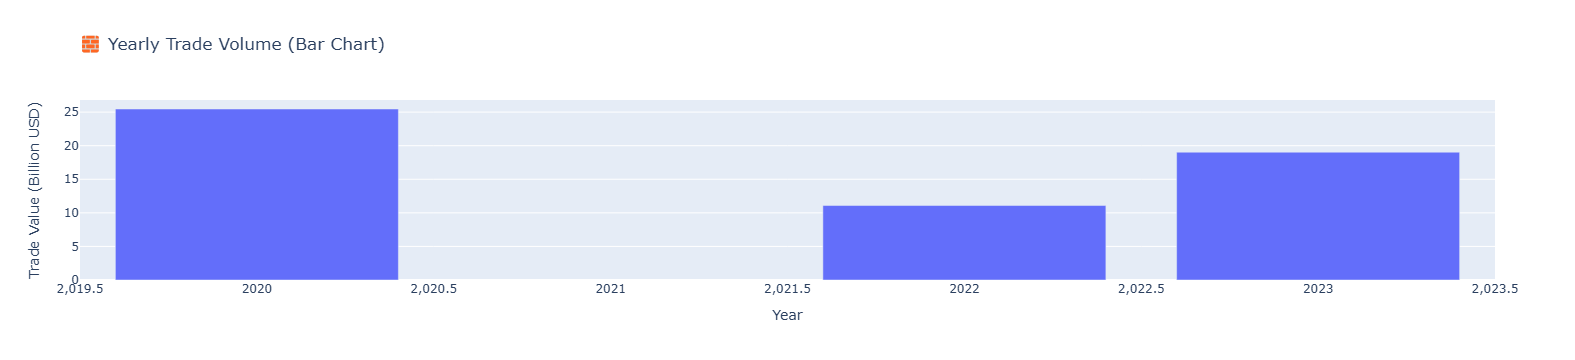

In [280]:
# Bar Plot: Trade Volume per Year
fig3 = px.bar(trade_by_year, x='year', y='value_billion_usd',
              title='🧱 Yearly Trade Volume (Bar Chart)',
              labels={'value_billion_usd': 'Trade Value (Billion USD)', 'year': 'Year'})
fig3.show()

**4. Total Trade by Importer (Grouped by Exporter)**

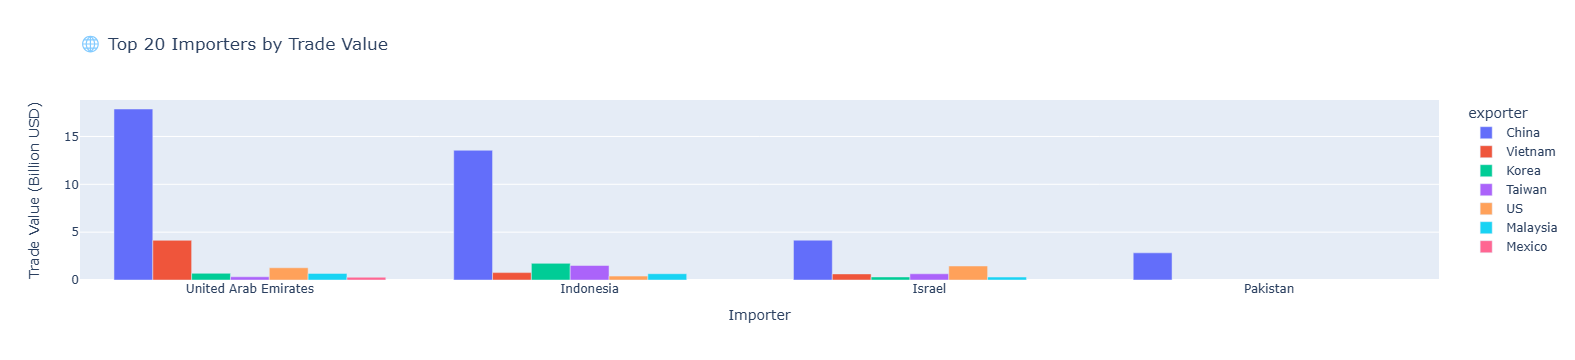

In [283]:
# Total Trade by Importer (Grouped by Exporter)
trade_by_importer = df.groupby(['exporter', 'importer'])['value_billion_usd'].sum().reset_index()
top_importers = trade_by_importer.sort_values(by='value_billion_usd', ascending=False).head(20)

fig4 = px.bar(top_importers, x='importer', y='value_billion_usd', color='exporter',
              title='🌐 Top 20 Importers by Trade Value',
              labels={'value_billion_usd': 'Trade Value (Billion USD)', 'importer': 'Importer'},
              barmode='group')
fig4.show()